In [1]:
import albumentations as A
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
folder_path = Path("./samples_31_aug")
arr = np.load(folder_path / "combined.npy")
N, F, H, W, C = arr.shape
print(arr.shape)
arr = arr.reshape(-1, H, W, C)

(259, 10, 280, 160, 3)


### Define transformation

In [3]:
transforms = [A.HorizontalFlip(p=1.0)]

In [4]:
transformed = []
for transform in transforms:
    results = np.zeros_like(arr)
    for i, frame in enumerate(arr):
        results[i] = transform(image=frame)['image']
    transformed.append(results)

transformed = np.concatenate(transformed, axis=0)
transformed = transformed.reshape(-1, F, H, W, C)
arr = arr.reshape(N, F, H, W, C)
print(transformed.shape[0])

259


### Verify the transformation has happened

In [5]:
arr[0, 0].shape

(280, 160, 3)

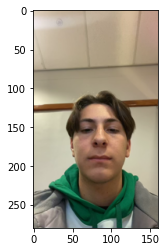

In [7]:
plt.imshow(arr[0, 0].astype(int))

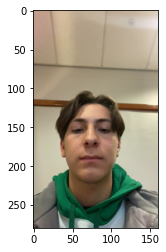

In [6]:
plt.imshow(transformed[0, 0].astype(int))

### Concat and save as numpy array

In [1]:
og_and_transformed = np.concatenate([arr, transformed], axis=0)
og_and_transformed.shape

NameError: name 'np' is not defined

In [ ]:
### Further augment by reversing order of videos

In [23]:
# Reverse order of frames
augmented = np.concatenate([og_and_transformed, np.flip(og_and_transformed, axis=1)], axis=0)
augmented.shape

(148, 10, 280, 160, 3)

In [26]:
np.save(folder_path / "augmented.npy", augmented)
np.load(folder_path / "augmented.npy").shape

(148, 10, 280, 160, 3)

: 